## Importing Necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [2]:
transaction = pd.read_csv('QVI_transaction_data.csv')
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [3]:
transaction.shape

(264836, 8)

There are **8 features** & **264836 transactions**.

In [4]:
transaction.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [5]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  object 
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(5), object(2)
memory usage: 16.2+ MB


The **datatype** of **DATE** column is **object**. Need to change the it to 'date' format.

In [6]:
transaction['DATE'] = pd.to_datetime(transaction['DATE'], format='%Y-%m-%d')
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [7]:
transaction['DATE'].min()

Timestamp('2018-07-01 00:00:00')

In [8]:
transaction['DATE'].max()

Timestamp('2019-06-30 00:00:00')

The transactions are in the duration **1 July 2018** and **30 June 2019**.

In [9]:
# Checking the datatypes of all columns

transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


In [10]:
transaction.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [11]:
len(transaction['PROD_NAME'].unique())

114

There are about **114 unique products**. Let's check the product names & check for any irrelevant items.

In [12]:
transaction['PROD_NAME'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

There are some **Salsa products in the data**. As we are only concerned with the chips data, we'll remove these.

In [13]:
transaction = transaction[~transaction['PROD_NAME'].str.contains('Salsa')]
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [14]:
transaction.shape

(246742, 8)

In [15]:
len(transaction['PROD_NAME'].unique())

105

There are **105 varieties of chips of different brands & flavours**.

The **product names have whitespaces** in them. These need to be removed.

In [16]:
# Removing white spaces from PROD_NAME

transaction['PROD_NAME'] = transaction['PROD_NAME'].replace('\s+', ' ', regex=True)

In [17]:
transaction['PROD_NAME'].unique()

array(['Natural Chip Compny SeaSalt175g', 'CCs Nacho Cheese 175g',
       'Smiths Crinkle Cut Chips Chicken 170g',
       'Smiths Chip Thinly S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour Cream&Chives 210G',
       'Kettle Sensations Siracha Lime 150g', 'Twisties Cheese 270g',
       'WW Crinkle Cut Chicken 175g', 'Thins Chips Light& Tangy 175g',
       'CCs Original 175g', 'Burger Rings 220g',
       'NCC Sour Cream & Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt And Vinegar 175g',
       'Smiths Chip Thinly Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai Chilli&Lime 150g',
       'Pringles Sthrn FriedChicken 13

Let's create 2 new columns **'brand'** & **'pack size'**.

In [18]:
transaction['Brand'] = transaction['PROD_NAME'].str.split(' ').str[0]
transaction['Pack_Size(g)'] = transaction['PROD_NAME'].str.extract('(\d+)', expand=False)

In [19]:
transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size(g)
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,Natural,175
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150


In [20]:
transaction['Pack_Size(g)'].unique()

array(['175', '170', '150', '330', '210', '270', '220', '125', '110',
       '134', '380', '180', '165', '135', '250', '200', '160', '190',
       '90', '70'], dtype=object)

In [21]:
transaction['Pack_Size(g)'] = transaction['Pack_Size(g)'].astype(int)

In [22]:
print('Minimum pack size: ', transaction['Pack_Size(g)'].min())
print('Maximum pack size: ', transaction['Pack_Size(g)'].max())

Minimum pack size:  70
Maximum pack size:  380


The **minimum** & **maximum** pack sizes seem **sensible**.

In [23]:
transaction['Brand'].unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Grain', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'NCC', 'Cheezels', 'Infzns',
       'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith', 'GrnWves',
       'Tyrrells', 'Cobs', 'French', 'RRD', 'Tostitos', 'Cheetos',
       'Woolworths', 'Snbts', 'Sunbites'], dtype=object)

**Some brand names seem incorrect**. Let's investigate further.

In [24]:
transaction[transaction['Brand'] == 'Burger'].head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size(g)
16,2018-08-18,20,20418,17413,94,Burger Rings 220g,4,9.2,Burger,220
187,2018-08-19,256,256041,255158,94,Burger Rings 220g,2,4.6,Burger,220
303,2018-09-20,5,5028,4536,94,Burger Rings 220g,2,4.6,Burger,220


In [25]:
transaction[transaction['Brand'] == 'French'].head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size(g)
86,2019-05-19,115,115381,118981,29,French Fries Potato Chips 175g,1,3.0,French,175
680,2018-09-20,33,33019,29543,29,French Fries Potato Chips 175g,2,6.0,French,175
780,2018-08-25,39,39134,35434,29,French Fries Potato Chips 175g,2,6.0,French,175


In [26]:
transaction[transaction['Brand'] == 'Grain'].head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size(g)
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6,Grain,210
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2,Grain,210
85,2019-05-18,114,114185,118043,24,Grain Waves Sweet Chilli 210g,1,3.6,Grain,210


In [27]:
transaction[transaction['Brand'] == 'Red'].head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size(g)
28,2018-08-15,41,41486,38472,13,Red Rock Deli Thai Chilli&Lime 150g,1,2.7,Red,150
34,2018-08-16,51,51100,46802,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,Red,150
212,2019-03-13,1,1348,391,48,Red Rock Deli Sp Salt & Truffle 150G,1,2.7,Red,150


* **Some of the brand names look like they are the same** - such as Red and RRD(which are both Red Rock Deli chips), Snbts & sunbites, GrnWves & Green waves, Dorito & Doritos, Infzns & Infuzions, Smith & smiths, Woolworths & WW, NCC & Natural Chip Co. These need to be clubbed together.
* While there are **some brands where only first word has been extracted instead of the complete brand name** - such as French instead of French Fries, Red instead of Red Rock Deli, Grain instead of Grain waves. These need to be corrected.

In [28]:
transaction['Brand'].replace('French', 'French Fries',inplace=True)
transaction['Brand'].replace('Dorito', 'Doritos',inplace=True)
transaction['Brand'].replace('Infzns', 'Infuzions',inplace=True)
transaction['Brand'].replace('Snbts', 'Sunbites',inplace=True)
transaction['Brand'].replace('Natural', 'NCC',inplace=True)
transaction['Brand'].replace('Red', 'RRD',inplace=True)
transaction['Brand'].replace('WW', 'Woolworths',inplace=True)
transaction['Brand'].replace(['Grain','GrnWves'], 'Grain Waves',inplace=True)
transaction['Brand'].replace(['Burger','Smith'], 'Smiths',inplace=True)

In [29]:
transaction['Brand'].unique()

array(['NCC', 'CCs', 'Smiths', 'Kettle', 'Grain Waves', 'Doritos',
       'Twisties', 'Woolworths', 'Thins', 'Cheezels', 'Infuzions', 'RRD',
       'Pringles', 'Tyrrells', 'Cobs', 'French Fries', 'Tostitos',
       'Cheetos', 'Sunbites'], dtype=object)

In [30]:
transaction.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'Brand', 'Pack_Size(g)'],
      dtype='object')

In [31]:
transaction[['PROD_QTY', 'TOT_SALES', 'Pack_Size(g)']].describe()

,PROD_QTY,TOT_SALES,Pack_Size(g)
count,246742.000000,246742.000000,246742.000000
mean,1.908062,7.321322,175.585178
std,0.659831,3.077828,59.434727
min,1.000000,1.700000,70.000000
25%,2.000000,5.800000,150.000000
50%,2.000000,7.400000,170.000000
75%,2.000000,8.800000,175.000000
max,200.000000,650.000000,380.000000


**PROD_QTY** appears to **have an outlier** which we should investigate further.

c:\python 39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROD_QTY'>

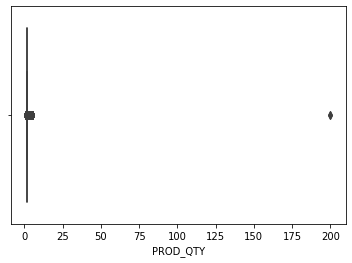

In [32]:
# Checking for outliers

sns.boxplot(transaction['PROD_QTY'])

Let's investigate this further.

In [33]:
transaction[transaction['PROD_QTY'] == 200]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size(g)
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380


In [34]:
transaction[transaction['LYLTY_CARD_NBR'] == 226000]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size(g)
69762,2018-08-19,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380
69763,2019-05-20,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,Doritos,380


* These transactions are made by the **same customer**. This customer has made only **2 transactions for the whole duration**. 
* It seems that this customer is not a regular retail customer but buying it for commercial purposes. Need to remove this customer.

In [35]:
transaction = transaction[transaction['LYLTY_CARD_NBR'] != 226000]

c:\python 39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PROD_QTY'>

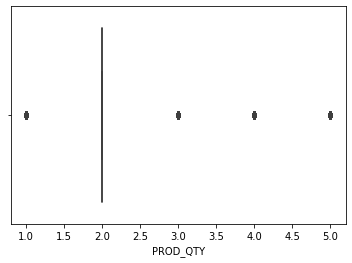

In [36]:
sns.boxplot(transaction['PROD_QTY'])

Let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.

In [37]:
# Count the number of transactions by date

len(transaction['DATE'].unique())

364

There's **1 missing date**. Need to check.

In [38]:
# Setting the Date values as index

df = transaction.set_index('DATE')

In [39]:
# checking the missing date value

print(pd.date_range(start="2018-07-01", end="2019-06-30").difference(df.index))

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)


* **No transactions(no sales)** took place on **25 Dec 2018(Christmas day)**.
* Let's take a closer look at the sales in Dec 2018

In [40]:
# Extracting the dataset for Dec 2018

December = transaction[transaction['DATE'].dt.month == 12]
December.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size(g)
224,2018-12-14,2,2256,866,55,Snbts Whlgrn Crisps Cheddr&Mstrd 90g,1,1.7,Sunbites,90
232,2018-12-17,2,2454,1071,34,Pringles Slt Vingar 134g,1,3.7,Pringles,134
265,2018-12-12,4,4074,2980,4,Dorito Corn Chp Supreme 380g,2,13.0,Doritos,380
284,2018-12-02,4,4371,4315,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,2,9.2,Kettle,150
285,2018-12-24,4,4371,4316,78,Thins Chips Salt & Vinegar 175g,2,6.6,Thins,175


In [41]:
# Aggregating the total sales for Dec 2018 for each date

Dec = pd.DataFrame(December.groupby(December['DATE'].dt.date).sum()['TOT_SALES']).reset_index()
Dec

,DATE,TOT_SALES
0,2018-12-01,5000.9
1,2018-12-02,4781.1
2,2018-12-03,4927.0
3,2018-12-04,4869.4
4,2018-12-05,4900.5
5,2018-12-06,4792.9
6,2018-12-07,4971.7
7,2018-12-08,4618.4
8,2018-12-09,4844.8
9,2018-12-10,5037.7


In [42]:
# Converting DATE column to datetime

Dec['DATE'] = Dec['DATE'].astype('datetime64')

In [43]:
# Creating a sequence of dates in the range 1 Dec 2018 to 31 dec 2018

dates = pd.DataFrame(pd.date_range(start="2018-12-01",end="2018-12-31"), columns=['DATE'])
dates

,DATE
0,2018-12-01
1,2018-12-02
2,2018-12-03
3,2018-12-04
4,2018-12-05
5,2018-12-06
6,2018-12-07
7,2018-12-08
8,2018-12-09
9,2018-12-10


In [44]:
# Combining the tables

Dec_date = pd.merge(left = dates, right = Dec, how= 'left', on = 'DATE')
Dec_date

,DATE,TOT_SALES
0,2018-12-01,5000.9
1,2018-12-02,4781.1
2,2018-12-03,4927.0
3,2018-12-04,4869.4
4,2018-12-05,4900.5
5,2018-12-06,4792.9
6,2018-12-07,4971.7
7,2018-12-08,4618.4
8,2018-12-09,4844.8
9,2018-12-10,5037.7


In [45]:
# Converting DATE from datetime to date

Dec_date["DATE"] = pd.to_datetime(Dec_date["DATE"]).dt.date

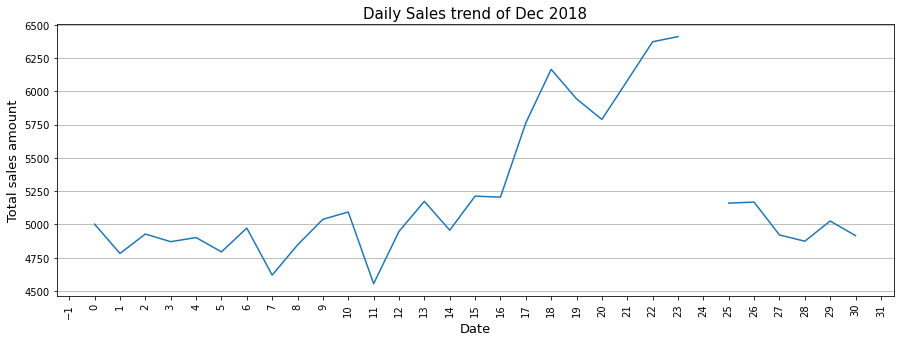

In [46]:
import datetime
import matplotlib.dates as mdates

plt.figure(figsize=(15,5))
plt.plot(Dec_date.index, Dec_date['TOT_SALES'])
plt.title('Daily Sales trend of Dec 2018', fontsize=15)
plt.xlabel("Date", fontsize=13)
plt.ylabel("Total sales amount", fontsize=13)
plt.xticks(rotation=90)
plt.grid(axis = 'y')

ax=plt.gca()
# Find the days in the data
days = mdates.DayLocator()
# Set xaxis to use the day locator
ax.xaxis.set_major_locator(days)
plt.show()

* We can see that there is an **increase in purchases in December** and a **break in late December**. 
* We can see that the increase in sales occurs in the lead-up to Christmas and that there are **zero sales on Christmas day** itself. This is due to shops being closed on Christmas day.

In [47]:
purchase = pd.read_csv('QVI_purchase_behaviour.csv')
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [48]:
purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [49]:
purchase['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

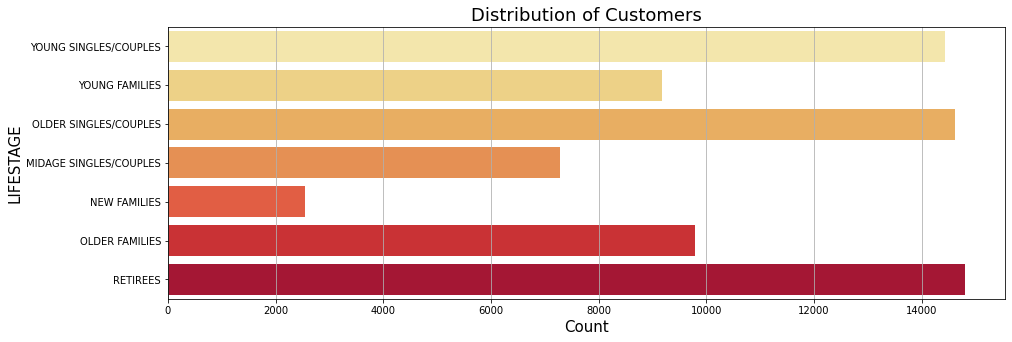

In [50]:
plt.figure(figsize=(15,5))
sns.countplot(y='LIFESTAGE', data=purchase, palette='YlOrRd')
plt.title('Distribution of Customers', fontsize=18)
plt.ylabel("LIFESTAGE", fontsize=15)
plt.xlabel("Count", fontsize=15)
plt.grid(axis = 'x')
plt.show()

Majority of the customers are: **retirees** and **older singles/couples**.

In [51]:
purchase['PREMIUM_CUSTOMER'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

c:\python 39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PREMIUM_CUSTOMER', ylabel='count'>

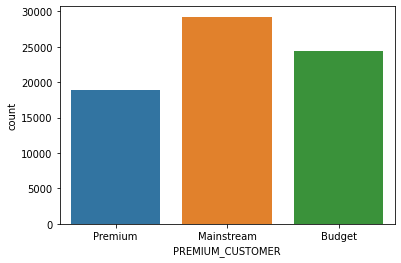

In [52]:
sns.countplot(purchase['PREMIUM_CUSTOMER'])

Majority of the customers are from **Mainstream segment**.

In [53]:
transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            246740 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
 8   Brand           246740 non-null  object        
 9   Pack_Size(g)    246740 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(5), object(2)
memory usage: 19.8+ MB


In [54]:
transaction['LYLTY_CARD_NBR'] = transaction['LYLTY_CARD_NBR'].astype('int64')

Need to **merge the transactions & purchase_behaviour datasets** by performing a left join to get all the records from transaction data & corresponding values from the purchase_behaviour data.

In [55]:
combine = pd.merge(left = transaction, right = purchase, how= 'left', on = 'LYLTY_CARD_NBR')
combine.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size(g),LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NCC,175,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,MIDAGE SINGLES/COUPLES,Budget


In [56]:
combine.isnull().sum()

DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
Brand               0
Pack_Size(g)        0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There are **no nulls!** So all our customers in the transaction data has been accounted for in the customer dataset.

In [57]:
# Saving the merged & corrected data

combine.to_csv('merged_Quantium_dataset.csv')

## Data Analysis

### 1) Top 10 Products by Total Sales amount

In [58]:
products = pd.DataFrame(transaction.groupby('PROD_NAME').sum()['TOT_SALES']).sort_values('TOT_SALES', 
                                                                                         ascending=False).round(2)[:10]

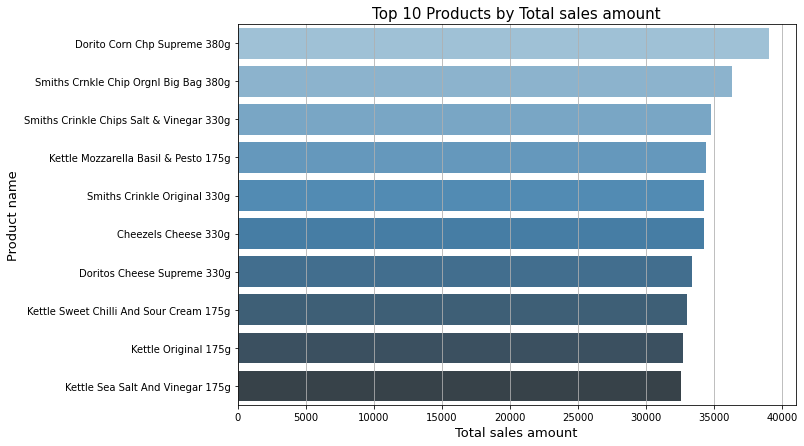

In [59]:
plt.figure(figsize=(10,7))
sns.barplot(x=products['TOT_SALES'].values, y=products.index, data=products, palette="Blues_d", orient='h')
plt.title('Top 10 Products by Total sales amount', fontsize=15)
plt.xlabel("Total sales amount", fontsize=13)
plt.ylabel("Product name", fontsize=13)
plt.grid(axis = 'x')
plt.show()

### 2) Top 10 Customers by Total Sales amount

In [60]:
transaction['LYLTY_CARD_NBR'] = transaction['LYLTY_CARD_NBR'].astype(str)

In [61]:
Customer = pd.DataFrame(transaction.groupby('LYLTY_CARD_NBR').sum()['TOT_SALES']).sort_values('TOT_SALES', 
                                                                                            ascending=False).round(2)[:10]

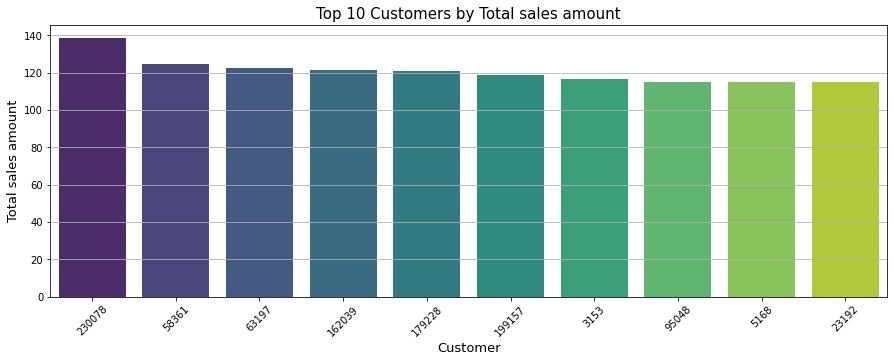

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(x=Customer.index, y=Customer['TOT_SALES'].values, data=Customer, palette="viridis")
plt.title('Top 10 Customers by Total sales amount', fontsize=15)
plt.xlabel("Customer", fontsize=13)
plt.ylabel("Total sales amount", fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.show()

### 3) Top 10 Brands by Total Sales amount

In [63]:
Brand = pd.DataFrame(transaction.groupby('Brand').sum()['TOT_SALES']).sort_values('TOT_SALES', 
                                                                                  ascending=False).round(2)[:10]

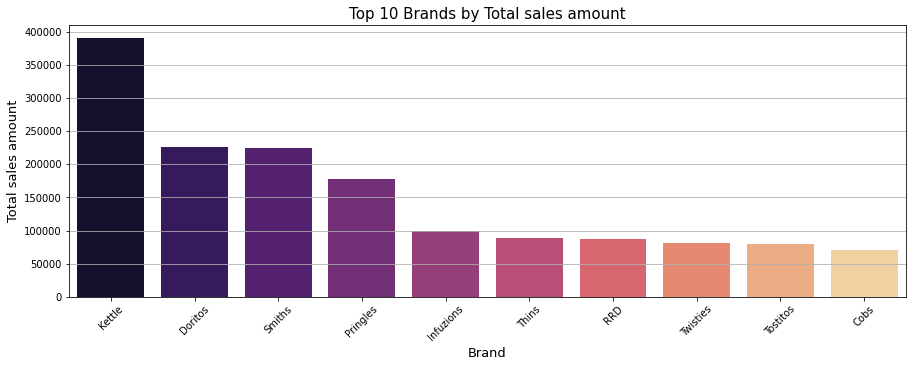

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(x=Brand.index, y=Brand['TOT_SALES'].values, data=Brand, palette="magma")
plt.title('Top 10 Brands by Total sales amount', fontsize=15)
plt.xlabel("Brand", fontsize=13)
plt.ylabel("Total sales amount", fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.show()

### 4) Pack Sizes preferred by Customers

In [65]:
Pack_Size = pd.DataFrame(transaction.groupby('Pack_Size(g)').sum()['TOT_SALES']).sort_values('TOT_SALES', 
                                                                                             ascending=False).round(2)[:10]

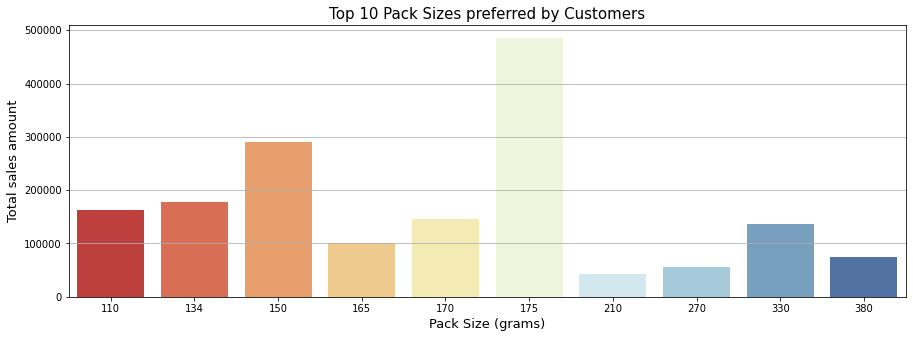

In [66]:
plt.figure(figsize=(15,5))
sns.barplot(x=Pack_Size.index, y=Pack_Size['TOT_SALES'].values, data=Pack_Size, palette="RdYlBu")
plt.title('Top 10 Pack Sizes preferred by Customers', fontsize=15)
plt.xlabel("Pack Size (grams)", fontsize=13)
plt.ylabel("Total sales amount", fontsize=13)
plt.grid(axis = 'y')
plt.show()

### 5) Who spends the most on chips (total sales) by Customer Lifestage?

In [67]:
age_cust = pd.DataFrame(combine.groupby('LIFESTAGE').sum()['TOT_SALES']).sort_values('TOT_SALES', 
                                                                                     ascending=False).round(2)

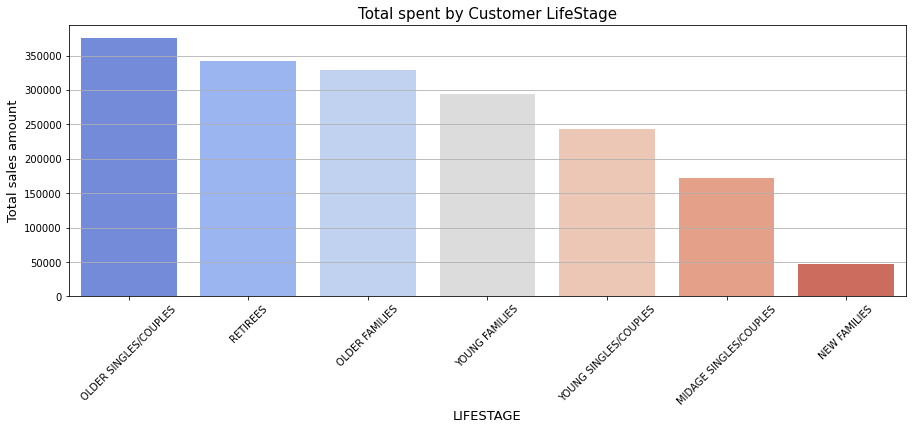

In [68]:
plt.figure(figsize=(15,5))
sns.barplot(x=age_cust.index, y=age_cust['TOT_SALES'].values, data=age_cust, palette="coolwarm")
plt.title('Total spent by Customer LifeStage', fontsize=15)
plt.xlabel("LIFESTAGE", fontsize=13)
plt.ylabel("Total sales amount", fontsize=13)
plt.xticks(rotation=45)
plt.grid(axis = 'y')
plt.show()

### 6) Who spends the most on chips (total sales) by Customer category?

In [69]:
cust_cat = pd.DataFrame(combine.groupby('PREMIUM_CUSTOMER').sum()['TOT_SALES']).sort_values('TOT_SALES', 
                                                                                            ascending=False).round(2)
cust_cat.values

array([[700865.4 ],
       [631406.85],
       [472905.45]])

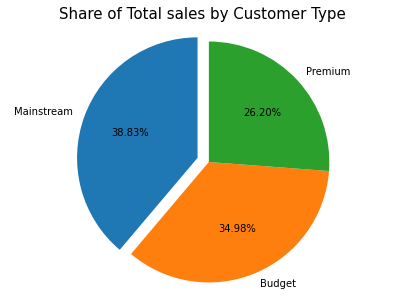

In [70]:
plt.figure(figsize = (7,5))
explode = (0.1, 0, 0)
plt.pie(cust_cat.values.flatten(), labels=cust_cat.index , explode=explode, autopct='%1.2f%%', startangle=90)
plt.title('Share of Total sales by Customer Type', fontsize = 15)
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### 7) Which Customer segment is contributing more to the Total sales (by Lifestage & Customer category)?

In [71]:
pd.DataFrame(combine.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).sum()['TOT_SALES']).sort_values('TOT_SALES', 
                                                                                                ascending=False)[:5]

TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                       
Budget           OLDER FAMILIES         156863.75
Mainstream       YOUNG SINGLES/COUPLES  147582.20
                 RETIREES               145168.95
Budget           YOUNG FAMILIES         129717.95
                 OLDER SINGLES/COUPLES  127833.60

In [72]:
df1 = pd.pivot_table(combine, index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='TOT_SALES', aggfunc='sum')
df1

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,33345.70,84734.25,54443.85
NEW FAMILIES,20607.45,15979.70,10760.80
OLDER FAMILIES,156863.75,96413.55,75242.60
OLDER SINGLES/COUPLES,127833.60,124648.50,123537.55
RETIREES,105916.30,145168.95,91296.65
YOUNG FAMILIES,129717.95,86338.25,78571.70
YOUNG SINGLES/COUPLES,57122.10,147582.20,39052.30


In [73]:
df1.values

array([[ 33345.7 ,  84734.25,  54443.85],
       [ 20607.45,  15979.7 ,  10760.8 ],
       [156863.75,  96413.55,  75242.6 ],
       [127833.6 , 124648.5 , 123537.55],
       [105916.3 , 145168.95,  91296.65],
       [129717.95,  86338.25,  78571.7 ],
       [ 57122.1 , 147582.2 ,  39052.3 ]])

In [74]:
df1.index

Index(['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG FAMILIES',
       'YOUNG SINGLES/COUPLES'],
      dtype='object', name='LIFESTAGE')

In [75]:
df1.values.sum()

1805177.7

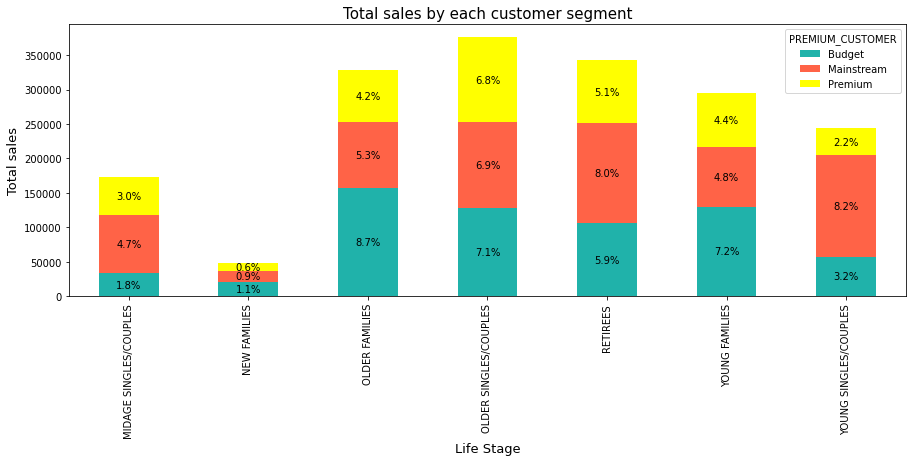

In [76]:
ax = df1.plot.bar(stacked=True, color =['lightseagreen', 'tomato', 'yellow'], figsize=(15,5))
ax.set_title('Total sales by each customer segment', fontsize=15)
ax.set_xticklabels(['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES', 
                    'YOUNG FAMILIES', 'YOUNG SINGLES/COUPLES'])
plt.ylabel('Total sales', fontsize=13)
plt.xlabel('Life Stage', fontsize=13)
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = f'{((height/1805177.7)*100):.1f}%'
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center')
plt.show()

Sales are coming mainly from **Budget - older families**, **Mainstream - young singles/couples**, and **Mainstream - retirees**

Let's see if the higher sales are due to there being more customers who buy chips in these customer segments.

### 8) Number of customers by LIFESTAGE and PREMIUM_CUSTOMER

In [77]:
pd.DataFrame(combine.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"])['LYLTY_CARD_NBR'].nunique().reset_index(name=
                                                           'Cust_count').sort_values(['Cust_count'], ascending=False))[:5]

,PREMIUM_CUSTOMER,LIFESTAGE,Cust_count
13,Mainstream,YOUNG SINGLES/COUPLES,7917
11,Mainstream,RETIREES,6358
10,Mainstream,OLDER SINGLES/COUPLES,4858
3,Budget,OLDER SINGLES/COUPLES,4849
17,Premium,OLDER SINGLES/COUPLES,4682


In [78]:
df2 = pd.pivot_table(combine, index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='LYLTY_CARD_NBR', aggfunc='nunique')
df2

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,1474,3298,2369
NEW FAMILIES,1087,830,575
OLDER FAMILIES,4611,2788,2231
OLDER SINGLES/COUPLES,4849,4858,4682
RETIREES,4385,6358,3812
YOUNG FAMILIES,3953,2685,2398
YOUNG SINGLES/COUPLES,3647,7917,2480


In [79]:
df2.values.sum()

71287

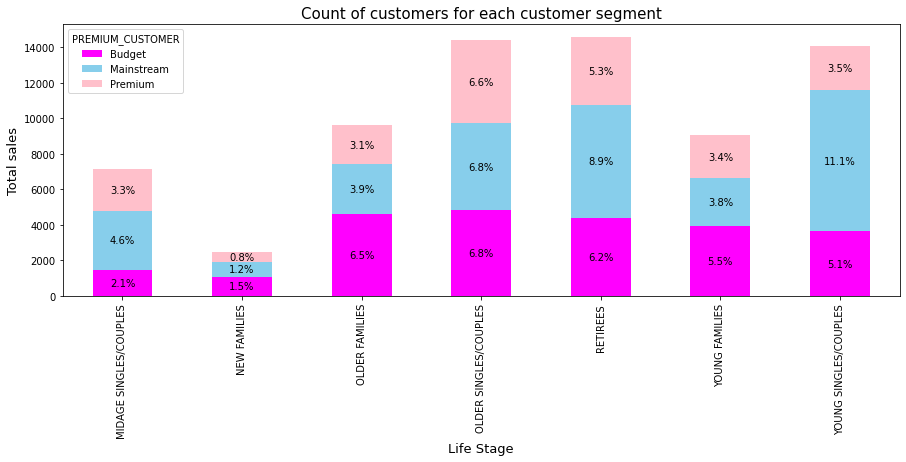

In [80]:
ax = df2.plot.bar(stacked=True, color =['magenta', 'skyblue', 'pink'], figsize=(15,5))
ax.set_title('Count of customers for each customer segment', fontsize=15)
ax.set_xticklabels(['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES', 'OLDER SINGLES/COUPLES', 'RETIREES', 
                    'YOUNG FAMILIES', 'YOUNG SINGLES/COUPLES'])
plt.ylabel('Total sales', fontsize=13)
plt.xlabel('Life Stage', fontsize=13)
for bar in ax.patches:
    height = bar.get_height()
    width = bar.get_width()
    x = bar.get_x()
    y = bar.get_y()
    label_text = f'{((height/71287)*100):.1f}%'
    label_x = x + width / 2
    label_y = y + height / 2
    ax.text(label_x, label_y, label_text, ha='center', va='center')
plt.show()

There are more **Mainstream - young singles/couples** and **Mainstream - retirees** who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment.

Higher sales may also be driven by more units of chips being bought per customer. Let's check for it.

### 9) Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

In [81]:
avg_units = pd.DataFrame(combine.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).agg({'PROD_QTY': 'sum', 
                                                                            'LYLTY_CARD_NBR': 'nunique'})).reset_index()
avg_units

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY,LYLTY_CARD_NBR
0,Budget,MIDAGE SINGLES/COUPLES,8883,1474
1,Budget,NEW FAMILIES,5241,1087
2,Budget,OLDER FAMILIES,41853,4611
3,Budget,OLDER SINGLES/COUPLES,32883,4849
4,Budget,RETIREES,26932,4385
5,Budget,YOUNG FAMILIES,34482,3953
6,Budget,YOUNG SINGLES/COUPLES,15500,3647
7,Mainstream,MIDAGE SINGLES/COUPLES,21213,3298
8,Mainstream,NEW FAMILIES,4060,830
9,Mainstream,OLDER FAMILIES,25804,2788


In [82]:
avg_units['unit_per_cust'] = avg_units['PROD_QTY']/avg_units['LYLTY_CARD_NBR']
avg_units

,PREMIUM_CUSTOMER,LIFESTAGE,PROD_QTY,LYLTY_CARD_NBR,unit_per_cust
0,Budget,MIDAGE SINGLES/COUPLES,8883,1474,6.026459
1,Budget,NEW FAMILIES,5241,1087,4.821527
2,Budget,OLDER FAMILIES,41853,4611,9.076773
3,Budget,OLDER SINGLES/COUPLES,32883,4849,6.781398
4,Budget,RETIREES,26932,4385,6.141847
5,Budget,YOUNG FAMILIES,34482,3953,8.722995
6,Budget,YOUNG SINGLES/COUPLES,15500,3647,4.250069
7,Mainstream,MIDAGE SINGLES/COUPLES,21213,3298,6.432080
8,Mainstream,NEW FAMILIES,4060,830,4.891566
9,Mainstream,OLDER FAMILIES,25804,2788,9.255380


In [83]:
df3 = pd.pivot_table(avg_units, index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='unit_per_cust', aggfunc='mean')
df3

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,6.026459,6.432080,6.078514
NEW FAMILIES,4.821527,4.891566,4.815652
OLDER FAMILIES,9.076773,9.255380,9.071717
OLDER SINGLES/COUPLES,6.781398,6.712021,6.769543
RETIREES,6.141847,5.925920,6.103358
YOUNG FAMILIES,8.722995,8.638361,8.716013
YOUNG SINGLES/COUPLES,4.250069,4.575597,4.264113


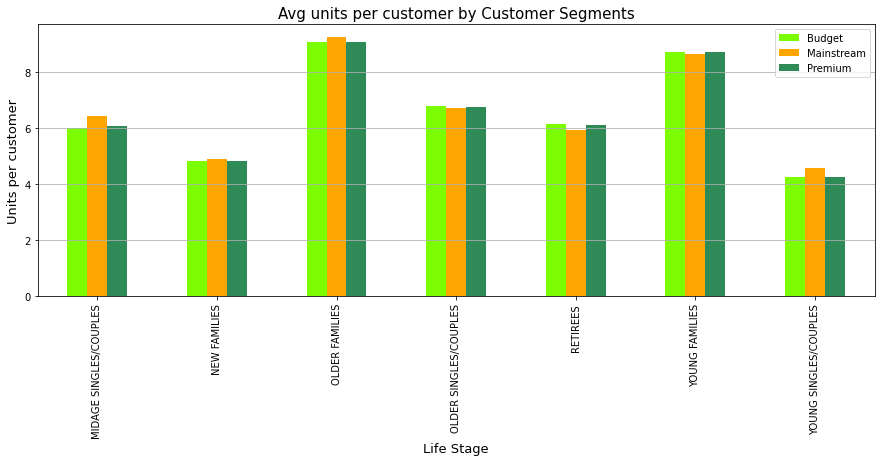

In [84]:
df3.plot.bar(rot = 90, color =['lawngreen', 'orange', 'seagreen'], figsize=(15,5))
plt.legend(['Budget', 'Mainstream', 'Premium'])
plt.title('Avg units per customer by Customer Segments', fontsize=15)
plt.xlabel('Life Stage', fontsize=13)
plt.ylabel('Units per customer', fontsize=13)
plt.grid(axis='y')
plt.show()

**Older families** and **young families** in general buy more chips per customer.

Let's also investigate the **average price per unit chips bought for each customer segment** as this is also a driver of total sales.

### 10) Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

In [85]:
combine['Unit_price'] = combine['TOT_SALES']/combine['PROD_QTY']
combine.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size(g),LIFESTAGE,PREMIUM_CUSTOMER,Unit_price
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,NCC,175,YOUNG SINGLES/COUPLES,Premium,3.00
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,CCs,175,MIDAGE SINGLES/COUPLES,Budget,2.10
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,Smiths,170,MIDAGE SINGLES/COUPLES,Budget,1.45
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,Smiths,175,MIDAGE SINGLES/COUPLES,Budget,3.00
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,Kettle,150,MIDAGE SINGLES/COUPLES,Budget,4.60


In [86]:
pd.DataFrame(combine.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"])['Unit_price'].mean()).sort_values(['Unit_price'], 
                                                                                               ascending=False)

Unit_price
PREMIUM_CUSTOMER LIFESTAGE                         
Mainstream       YOUNG SINGLES/COUPLES     4.065642
                 MIDAGE SINGLES/COUPLES    3.994241
Budget           RETIREES                  3.924404
Premium          RETIREES                  3.920942
Budget           NEW FAMILIES              3.917688
Mainstream       NEW FAMILIES              3.916133
Premium          OLDER SINGLES/COUPLES     3.893182
Budget           OLDER SINGLES/COUPLES     3.882096
Premium          NEW FAMILIES              3.872110
Mainstream       RETIREES                  3.844294
                 OLDER SINGLES/COUPLES     3.814665
Premium          MIDAGE SINGLES/COUPLES    3.770698
                 YOUNG FAMILIES            3.762150
Budget           YOUNG FAMILIES            3.760737
                 OLDER FAMILIES            3.745340
                 MIDAGE SINGLES/COUPLES    3.743328
Mainstream       OLDER FAMILIES            3.737077
                 YOUNG FAMILIES            3.724533
Premium          OLDER FAMILIES            3.717000
                 YOUNG SINGLES/COUPLES     3.665414
Budget           YOUNG SINGLES/COUPLES     3.657366

In [87]:
price_per_prod = pd.DataFrame(combine.groupby(["PREMIUM_CUSTOMER", "LIFESTAGE"]).agg({'TOT_SALES': 'sum', 
                                                                            'PROD_QTY': 'sum'})).reset_index()
price_per_prod

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,PROD_QTY
0,Budget,MIDAGE SINGLES/COUPLES,33345.70,8883
1,Budget,NEW FAMILIES,20607.45,5241
2,Budget,OLDER FAMILIES,156863.75,41853
3,Budget,OLDER SINGLES/COUPLES,127833.60,32883
4,Budget,RETIREES,105916.30,26932
5,Budget,YOUNG FAMILIES,129717.95,34482
6,Budget,YOUNG SINGLES/COUPLES,57122.10,15500
7,Mainstream,MIDAGE SINGLES/COUPLES,84734.25,21213
8,Mainstream,NEW FAMILIES,15979.70,4060
9,Mainstream,OLDER FAMILIES,96413.55,25804


In [88]:
price_per_prod['unit_price'] = price_per_prod['TOT_SALES']/price_per_prod['PROD_QTY']
price_per_prod

,PREMIUM_CUSTOMER,LIFESTAGE,TOT_SALES,PROD_QTY,unit_price
0,Budget,MIDAGE SINGLES/COUPLES,33345.70,8883,3.753878
1,Budget,NEW FAMILIES,20607.45,5241,3.931969
2,Budget,OLDER FAMILIES,156863.75,41853,3.747969
3,Budget,OLDER SINGLES/COUPLES,127833.60,32883,3.887529
4,Budget,RETIREES,105916.30,26932,3.932731
5,Budget,YOUNG FAMILIES,129717.95,34482,3.761903
6,Budget,YOUNG SINGLES/COUPLES,57122.10,15500,3.685297
7,Mainstream,MIDAGE SINGLES/COUPLES,84734.25,21213,3.994449
8,Mainstream,NEW FAMILIES,15979.70,4060,3.935887
9,Mainstream,OLDER FAMILIES,96413.55,25804,3.736380


In [89]:
df4 = pd.pivot_table(price_per_prod, index='LIFESTAGE', columns='PREMIUM_CUSTOMER', values='unit_price', aggfunc='mean')
df4

PREMIUM_CUSTOMER,Budget,Mainstream,Premium
LIFESTAGE,,,
MIDAGE SINGLES/COUPLES,3.753878,3.994449,3.780823
NEW FAMILIES,3.931969,3.935887,3.886168
OLDER FAMILIES,3.747969,3.736380,3.717703
OLDER SINGLES/COUPLES,3.887529,3.822753,3.897698
RETIREES,3.932731,3.852986,3.924037
YOUNG FAMILIES,3.761903,3.722439,3.759232
YOUNG SINGLES/COUPLES,3.685297,4.074043,3.692889


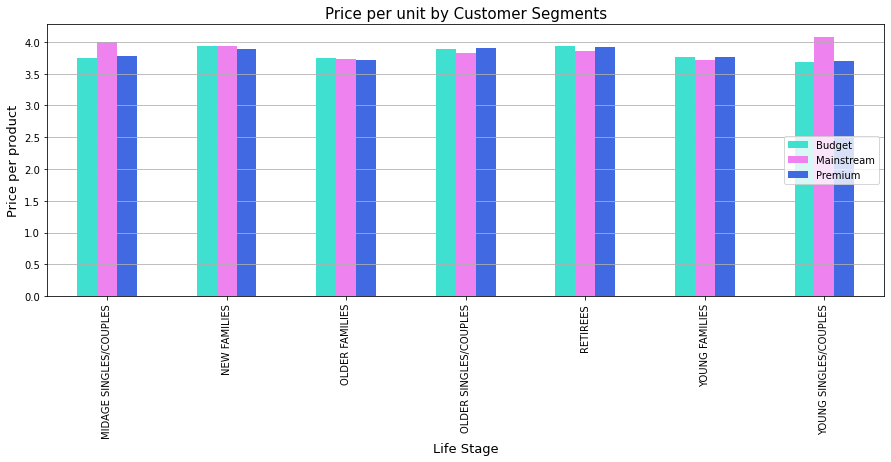

In [90]:
df4.plot.bar(rot = 90, color =['turquoise', 'violet', 'royalblue'], figsize=(15,5))
plt.legend(['Budget', 'Mainstream', 'Premium'])
plt.title('Price per unit by Customer Segments', fontsize=15)
plt.xlabel('Life Stage', fontsize=13)
plt.ylabel('Price per product', fontsize=13)
plt.grid(axis='y')
plt.legend(loc='right')
plt.show()

* **Mainstream midage and young singles and couples** are **more willing to pay more per packet of chips compared to their budget and premium counterparts**. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.
* This is also supported by there being **fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts**.

In [91]:
import scipy
from scipy import stats

In [92]:
combine['Unit_price'] = combine['TOT_SALES']/combine['PROD_QTY']

In [93]:
mainstream = combine[(combine['PREMIUM_CUSTOMER'] == 'Mainstream') & 
               (combine['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]

premium_budget = combine[(combine['PREMIUM_CUSTOMER'] != 'Mainstream') & 
               (combine['LIFESTAGE'].isin(['YOUNG SINGLES/COUPLES', 'MIDAGE SINGLES/COUPLES']))]

In [94]:
stats.ttest_ind(mainstream['Unit_price'], premium_budget['Unit_price'], equal_var=True)

Ttest_indResult(statistic=37.83196107667815, pvalue=2.235645611549355e-309)

In [95]:
print(mainstream['Unit_price'].mean()) ; print(premium_budget['Unit_price'].mean())

4.039785893795489
3.706491319964083


The **t-test** results in a **p-value < 2.2e-16**, hence we have to **reject the null hypothesis** & **accept the alternate hypothesis** i.e. the **unit price for mainstream, young and mid-age singles and couples** are significantly **higher than** that of **budget or premium, young and midage singles and couples**.

### 11) Brands that the top customer segment prefer

In [96]:
main_you_sin_cou = combine[(combine['PREMIUM_CUSTOMER'] == 'Mainstream') & 
                   (combine['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES')]

other = combine[~((combine['PREMIUM_CUSTOMER'] == 'Mainstream') & 
                   (combine['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES'))]

In [97]:
main_you_sin_cou.head(3)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,Brand,Pack_Size(g),LIFESTAGE,PREMIUM_CUSTOMER,Unit_price
221345,2018-08-16,1,1020,26,19,Smiths Crinkle Cut Snag&Sauce 150g,1,2.6,Smiths,150,YOUNG SINGLES/COUPLES,Mainstream,2.6
221346,2018-08-17,1,1163,188,46,Kettle Original 175g,1,5.4,Kettle,175,YOUNG SINGLES/COUPLES,Mainstream,5.4
221347,2018-08-14,1,1291,333,27,WW Supreme Cheese Corn Chips 200g,1,1.9,Woolworths,200,YOUNG SINGLES/COUPLES,Mainstream,1.9


In [98]:
main_you_sin_cou_qty = main_you_sin_cou['PROD_QTY'].sum()
Other_qty = other['PROD_QTY'].sum()

print('Mainstream product qty: ', main_you_sin_cou_qty)
print('Other product qty: ', Other_qty)

Mainstream product qty:  36225
Other product qty:  434174


In [99]:
m_brand = pd.DataFrame(main_you_sin_cou.groupby(['Brand']).agg({'PROD_QTY': 'sum'})).reset_index()
m_brand.head()

,Brand,PROD_QTY
0,CCs,405
1,Cheetos,291
2,Cheezels,651
3,Cobs,1617
4,Doritos,4447


In [100]:
m_brand['target_segment_brand'] = m_brand['PROD_QTY']/main_you_sin_cou_qty
m_brand[['Brand', 'target_segment_brand']].head()

,Brand,target_segment_brand
0,CCs,0.011180
1,Cheetos,0.008033
2,Cheezels,0.017971
3,Cobs,0.044638
4,Doritos,0.122761


In [101]:
p_b_brand = pd.DataFrame(other.groupby(['Brand']).agg({'PROD_QTY': 'sum'})).reset_index()
p_b_brand.head()

,Brand,PROD_QTY
0,CCs,8204
1,Cheetos,5239
2,Cheezels,8096
3,Cobs,16954
4,Doritos,43884


In [102]:
p_b_brand['other_segment_brand'] = p_b_brand['PROD_QTY']/Other_qty
p_b_brand[['Brand', 'other_segment_brand']].head()

,Brand,other_segment_brand
0,CCs,0.018896
1,Cheetos,0.012067
2,Cheezels,0.018647
3,Cobs,0.039049
4,Doritos,0.101075


In [103]:
m_brand_affinity = pd.merge(m_brand, p_b_brand, how='inner', on='Brand')
m_brand_affinity.head()

,Brand,PROD_QTY_x,target_segment_brand,PROD_QTY_y,other_segment_brand
0,CCs,405,0.011180,8204,0.018896
1,Cheetos,291,0.008033,5239,0.012067
2,Cheezels,651,0.017971,8096,0.018647
3,Cobs,1617,0.044638,16954,0.039049
4,Doritos,4447,0.122761,43884,0.101075


In [104]:
m_brand_affinity['brand_affinity'] = m_brand_affinity['target_segment_brand'] / m_brand_affinity['other_segment_brand']

In [105]:
m_brand_affinity[['Brand', 'target_segment_brand', 'other_segment_brand', 'brand_affinity']].sort_values('brand_affinity',
                                                                                            ascending=False)

,Brand,target_segment_brand,other_segment_brand,brand_affinity
17,Tyrrells,0.031553,0.025692,1.228095
16,Twisties,0.046184,0.037877,1.219319
4,Doritos,0.122761,0.101075,1.214553
8,Kettle,0.197985,0.165553,1.195897
15,Tostitos,0.045411,0.037978,1.195713
10,Pringles,0.119420,0.100635,1.186670
3,Cobs,0.044638,0.039049,1.143124
7,Infuzions,0.064679,0.057065,1.133435
14,Thins,0.060373,0.056986,1.059423
6,Grain Waves,0.032712,0.031188,1.048873


* **Mainstream young singles/couples** are **22% more likely** to purchase **Tyrrells** chips compared to the rest of the population.
* **Mainstream young singles/couples** are **52% less likely** to purchase **Woolworths** chips compared to the rest of the population.

### 12) Pack Sizes that the top customer segment prefer

In [106]:
m_packsize = pd.DataFrame(main_you_sin_cou.groupby(['Pack_Size(g)']).agg({'PROD_QTY': 'sum'})).reset_index()
m_packsize.head()

,Pack_Size(g),PROD_QTY
0,70,110
1,90,230
2,110,3850
3,125,109
4,134,4326


In [107]:
m_packsize['target_segment_packsize'] = m_packsize['PROD_QTY']/main_you_sin_cou_qty
m_packsize[['Pack_Size(g)', 'target_segment_packsize']].head()

,Pack_Size(g),target_segment_packsize
0,70,0.003037
1,90,0.006349
2,110,0.106280
3,125,0.003009
4,134,0.119420


In [108]:
p_b_packsize = pd.DataFrame(other.groupby(['Pack_Size(g)']).agg({'PROD_QTY': 'sum'})).reset_index()
p_b_packsize.head()

,Pack_Size(g),PROD_QTY
0,70,2745
1,90,5462
2,110,38985
3,125,2621
4,134,43693


In [109]:
p_b_packsize['other_segment_packsize'] = p_b_packsize['PROD_QTY']/Other_qty
p_b_packsize[['Pack_Size(g)', 'other_segment_packsize']].head()

,Pack_Size(g),other_segment_packsize
0,70,0.006322
1,90,0.012580
2,110,0.089791
3,125,0.006037
4,134,0.100635


In [110]:
m_packsize_affinity = pd.merge(m_packsize, p_b_packsize, how='inner', on='Pack_Size(g)')
m_packsize_affinity.head()

,Pack_Size(g),PROD_QTY_x,target_segment_packsize,PROD_QTY_y,other_segment_packsize
0,70,110,0.003037,2745,0.006322
1,90,230,0.006349,5462,0.012580
2,110,3850,0.106280,38985,0.089791
3,125,109,0.003009,2621,0.006037
4,134,4326,0.119420,43693,0.100635


In [112]:
m_packsize_affinity['packsize_affinity'] = m_packsize_affinity['target_segment_packsize'] / m_packsize_affinity['other_segment_packsize']

In [113]:
m_packsize_affinity[['Pack_Size(g)', 'target_segment_packsize', 'other_segment_packsize', 
                     'packsize_affinity']].sort_values('packsize_affinity', ascending=False)

,Pack_Size(g),target_segment_packsize,other_segment_packsize,packsize_affinity
17,270,0.031829,0.025096,1.268287
19,380,0.032160,0.025584,1.257030
18,330,0.061284,0.050162,1.221717
4,134,0.119420,0.100635,1.186670
2,110,0.106280,0.089791,1.183637
14,210,0.029124,0.025121,1.159318
5,135,0.014769,0.013075,1.129511
16,250,0.014355,0.012781,1.123166
9,170,0.080773,0.080986,0.997370
6,150,0.157598,0.163421,0.964372


It looks like **Mainstream young singles/couples** are **26% more likely** to purchase a **270g pack** of chips compared to the rest of the population but let’s dive into what brands sell this pack size.

In [114]:
combine[combine['Pack_Size(g)'] == 270]['Brand'].unique()

array(['Twisties'], dtype=object)

**Twisties** are the only brand offering **270g packs** and so this may instead be reflecting a higher likelihood of
purchasing Twisties.